LIBRARIES AND CONFIGURATIONS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression



LOAD DATASET

In [2]:
df = pd.read_csv("/Users/hazie/Desktop/imageclassification/data/global_disaster_response_2018_2024 (1).csv")

PREPROCESSING

In [3]:
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"])
    df["year"] = df["date"].dt.year
    df["month"] = df["date"].dt.month
    df["dayofyear"] = df["date"].dt.dayofyear
    df = df.drop(columns=["date"])

#Encoding categorical columns: 'country' and 'disaster_type'
le_country = LabelEncoder()
le_disaster = LabelEncoder()

df["country"] = le_country.fit_transform(df["country"])
df["disaster_type"] = le_disaster.fit_transform(df["disaster_type"])


Feature Selection and Train/Test Split

In [4]:
X = df.drop("recovery_days", axis=1)
y = df["recovery_days"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Model Training

In [6]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
pred = rf.predict(X_test)
pred[:10]   

array([ 84.94,  75.47,  51.86,  22.13,  38.05,  31.65,  52.44, 100.36,
        69.31,  42.91])

Model Evaluation

In [8]:
mse = mean_squared_error(y_test, pred)
rmse = (mse) ** 0.5
mae = mean_absolute_error(y_test, pred)
r2 = r2_score(y_test, pred)

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)


RMSE: 5.102478735869459
MAE: 4.067073
R²: 0.9358714236823336


Feature Importance(Random Forest)

In [9]:
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values(by="importance", ascending=False)

print(feature_importance_df)

                      feature  importance
2              severity_index    0.942144
9                   longitude    0.006396
6              aid_amount_usd    0.006341
4           economic_loss_usd    0.006245
8                    latitude    0.006188
3                  casualties    0.005737
5         response_time_hours    0.005583
7   response_efficiency_score    0.005495
12                  dayofyear    0.005235
0                     country    0.003931
1               disaster_type    0.002999
10                       year    0.002472
11                      month    0.001234


Exploratory Data Analysis (EDA)  
1.Top 10 Countries by Disaster Count

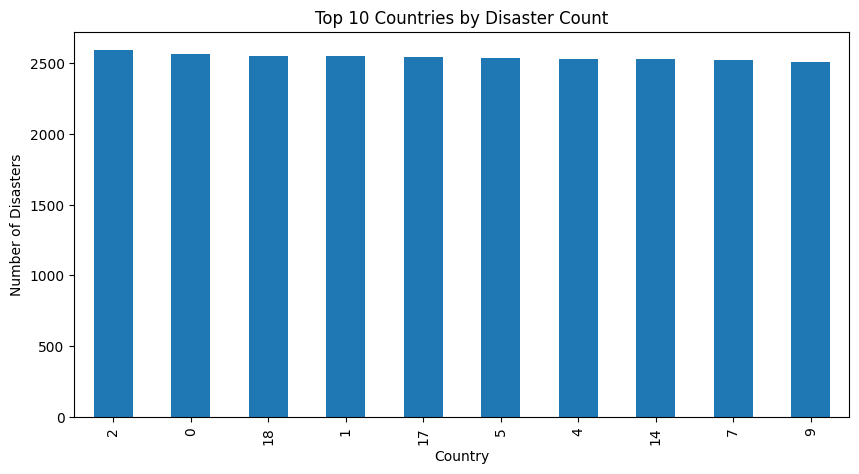

In [10]:
plt.figure(figsize=(10,5))
df["country"].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Countries by Disaster Count")
plt.xlabel("Country")
plt.ylabel("Number of Disasters")
plt.show()


Exploratory Data Analysis (EDA)
2.Distribution of Disaster Types

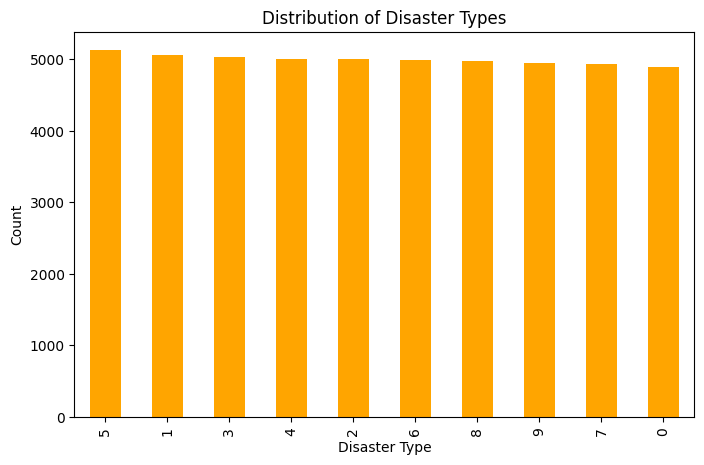

In [11]:
plt.figure(figsize=(8,5))
df["disaster_type"].value_counts().plot(kind='bar', color='orange')
plt.title("Distribution of Disaster Types")
plt.xlabel("Disaster Type")
plt.ylabel("Count")
plt.show()


Exploratory Data Analysis (EDA)
3.Recovery Days by Disaster Type (Boxplot)

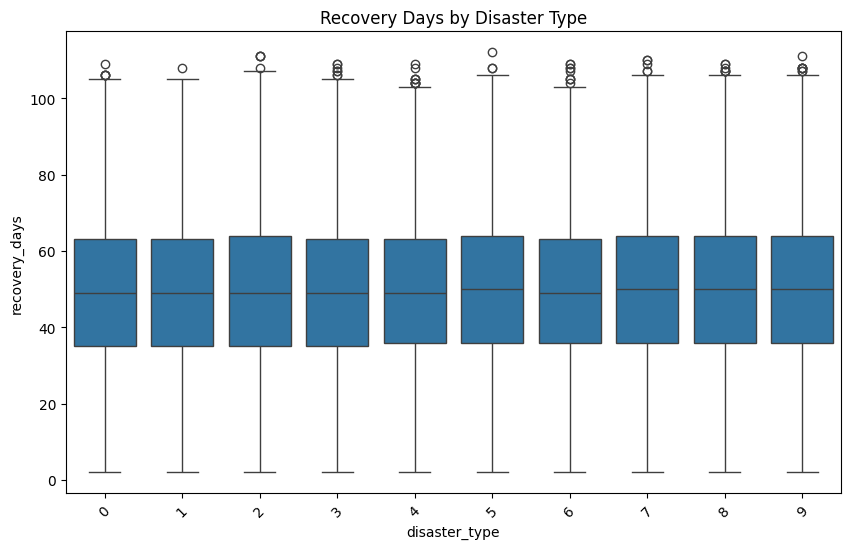

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df["disaster_type"], y=df["recovery_days"])
plt.xticks(rotation=45)
plt.title("Recovery Days by Disaster Type")
plt.show()


Exploratory Data Analysis (EDA)
4.Severity vs Recovery Days (Scatter Plot)

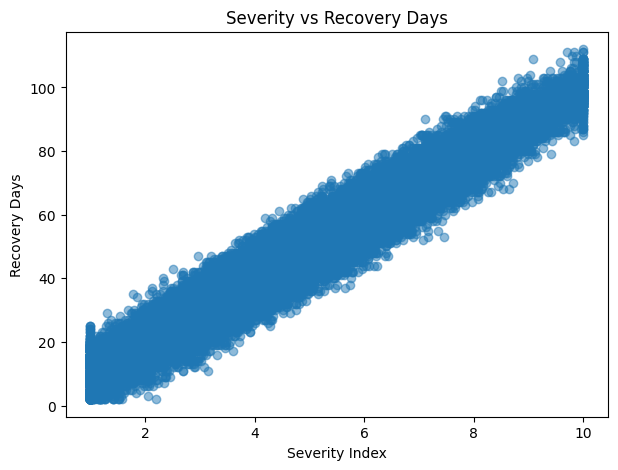

In [13]:
plt.figure(figsize=(7,5))
plt.scatter(df["severity_index"], df["recovery_days"], alpha=0.5)
plt.xlabel("Severity Index")
plt.ylabel("Recovery Days")
plt.title("Severity vs Recovery Days")
plt.show()
